# Unsupervised learning

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

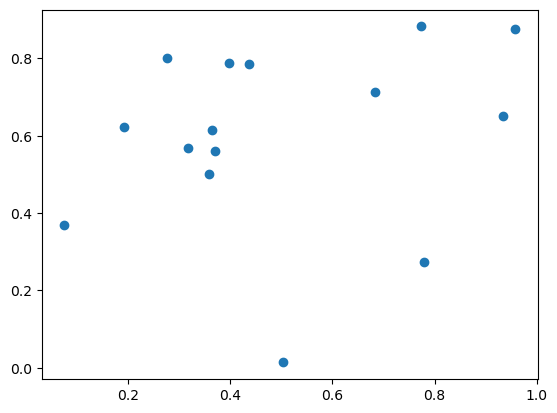

In [9]:
np.random.seed(1234)
points = np.random.rand(15, 2)
X = [i[0] for i in points]
y = [i[1] for i in points]
plt.scatter(X, y)

In [10]:
import pandas as pd
data_import = pd.read_csv("adult.csv")
data_import.columns = ["age","workclass","fnlwgt","Education","education_number","marital_status","Occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [11]:
data_import.columns

Index(['age', 'workclass', 'fnlwgt', 'Education', 'education_number',
       'marital_status', 'Occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [13]:
drop_race_education = data_import.copy()
drop_race_education = drop_race_education.drop(columns=["race", "Education"])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_encode_sex = drop_race_education
label_encode_sex["sex"] = le.fit_transform(label_encode_sex["sex"])


native_country = label_encode_sex
native_country["native_country"] = native_country["native_country"].map(lambda x: 0 if x ==" United-States" else 1)

y = native_country["income"]

drop_income = native_country
drop_income = drop_income.drop(columns="income")



In [18]:
ohe_data = pd.get_dummies(drop_income)
ohe_data

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

scaled_data = scaler.fit_transform(ohe_data)
cleaned_data = pd.DataFrame(data=scaled_data, columns=ohe_data.columns)
cleaned_data

,age,fnlwgt,education_number,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_ ?,workclass_ Federal-gov,...,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.837097,-1.008742,1.134779,0.703087,-0.145914,-0.216663,-2.222120,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,1.211600,-0.585105,-0.176253,-0.429354,-0.344038,-0.224930
1,-0.042640,0.245046,-0.420027,0.703087,-0.145914,-0.216663,-0.035430,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,-0.825355,1.709094,-0.176253,-0.429354,-0.344038,-0.224930
2,1.057031,0.425770,-1.197429,0.703087,-0.145914,-0.216663,-0.035430,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,1.211600,-0.585105,-0.176253,-0.429354,-0.344038,-0.224930
3,-0.775755,1.408146,1.134779,-1.422298,-0.145914,-0.216663,-0.035430,2.932897,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,-0.825355,-0.585105,-0.176253,-0.429354,-0.344038,4.445819
4,-0.115952,0.898170,1.523480,-1.422298,-0.145914,-0.216663,-0.035430,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,-0.825355,-0.585105,-0.176253,-0.429354,-0.344038,4.445819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.639710,0.746077,-1.422298,-0.145914,-0.216663,-0.197407,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,5.838339,-0.227107,-0.825355,-0.585105,-0.176253,-0.429354,-0.344038,4.445819
32556,0.103982,-0.335466,-0.420027,0.703087,-0.145914,-0.216663,-0.035430,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,1.211600,-0.585105,-0.176253,-0.429354,-0.344038,-0.224930
32557,1.423589,-0.358811,-0.420027,-1.422298,-0.145914,-0.216663,-0.035430,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,-0.825355,-0.585105,-0.176253,-0.429354,2.906654,-0.224930
32558,-1.215624,0.110927,-0.420027,0.703087,-0.145914,-0.216663,-1.655200,-0.340960,-0.244454,-0.174298,...,-0.142611,-0.355322,-0.171282,-0.227107,-0.825355,-0.585105,-0.176253,2.329082,-0.344038,-0.224930


In [19]:
k = 2
kmeans = KMeans(n_clusters=k)

y_pred = kmeans.fit_predict(cleaned_data)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

### Testing the number of clusters

In [22]:
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cleaned_data)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(cleaned_data,kmeans.labels_))


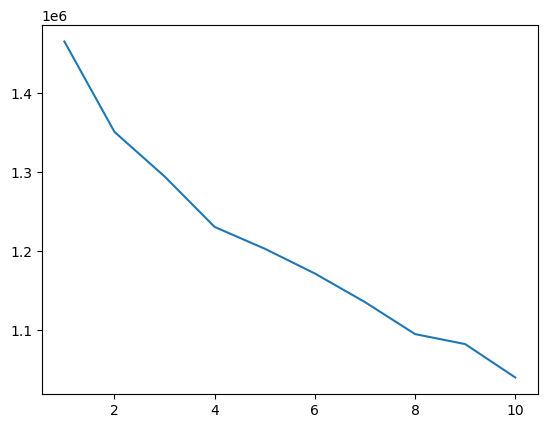

In [21]:
plt.plot(range(2,11),inertias)

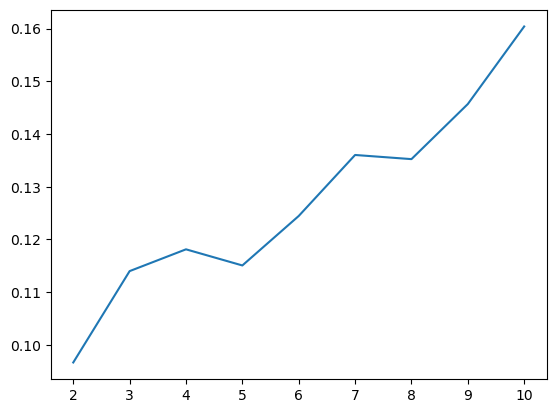

In [23]:
plt.plot(range(2,11),sil_scores)

In [24]:
k = 11
kmeans = KMeans(n_clusters=k)

y_pred = kmeans.fit_predict(cleaned_data)
y_pred

array([ 5,  0,  7, ..., 10,  3,  4])

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(cleaned_data)
type(X2D)

numpy.ndarray

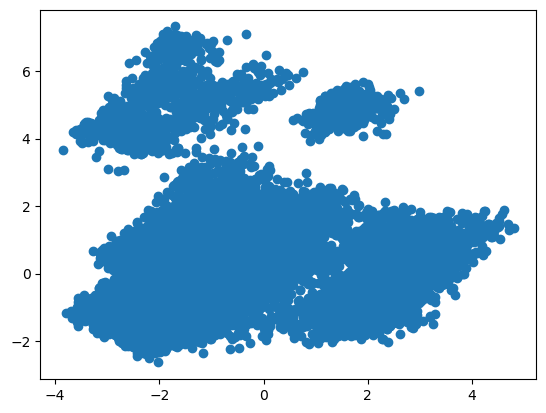

In [32]:
pd.concat([pd.DataFrame(data = X2D, columns = ["X","Y"]), pd.Series(y_pred, name = "Clusters")],axis = 1).to_csv("Clustering.csv",index =False)

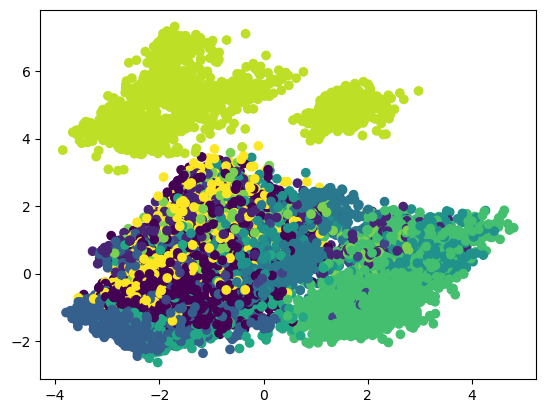

In [33]:
plt.scatter(X2D[:,0],X2D[:,1],c=y_pred)
